# Exemplo mostrando o TLC (Teorema Central do Limite)

Média de 9.782 e desvio padrão de 1.060
A distribuição adotada foi a  exponpow


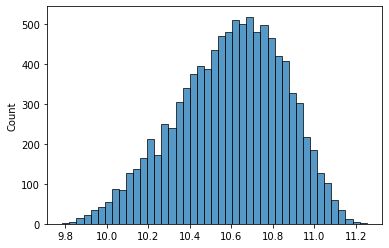

In [1]:
import pandas as pd
import numpy as np
import random as rnd
import scipy.stats as st
import seaborn as sns


DISTRIBUTIONS = [        
        st.alpha,st.anglit,st.arcsine,st.beta,st.betaprime,st.bradford,st.burr,st.cauchy,st.chi,st.chi2,st.cosine,
        st.dgamma,st.dweibull,st.erlang,st.expon,st.exponnorm,st.exponweib,st.exponpow,st.f,st.fatiguelife,st.fisk,
        st.foldcauchy,st.foldnorm,st.frechet_r,st.frechet_l,st.genlogistic,st.genpareto,st.gennorm,st.genexpon,
        st.genextreme,st.gausshyper,st.gamma,st.gengamma,st.genhalflogistic,st.gilbrat,st.gompertz,st.gumbel_r,
        st.gumbel_l,st.halfcauchy,st.halflogistic,st.halfnorm,st.halfgennorm,st.hypsecant,st.invgamma,st.invgauss,
        st.invweibull,st.johnsonsb,st.johnsonsu,st.ksone,st.kstwobign,st.laplace,st.levy,st.levy_l,st.levy_stable,
        st.logistic,st.loggamma,st.loglaplace,st.lognorm,st.lomax,st.maxwell,st.mielke,st.nakagami,st.ncx2,st.ncf,
        st.nct,st.norm,st.pareto,st.pearson3,st.powerlaw,st.powerlognorm,st.powernorm,st.rdist,st.reciprocal,
        st.rayleigh,st.rice,st.recipinvgauss,st.semicircular,st.t,st.triang,st.truncexpon,st.truncnorm,st.tukeylambda,
        st.uniform,st.vonmises,st.vonmises_line,st.wald,st.weibull_min,st.weibull_max,st.wrapcauchy
    ]

dist = rnd.choice(DISTRIBUTIONS)

media = 10*rnd.random()
desv = media*rnd.random()
n = 10_000

params = dist.fit(st.norm.rvs(size=n))
arg = params[:-2]

r = dist.rvs(size=n,loc = media, scale=desv, *arg)

print(f"Média de {media:.3f} e desvio padrão de {desv:.3f}")

print("A distribuição adotada foi a ",dist.name)

sns.histplot(data=r);

## Distribuições das Médias Amostrais

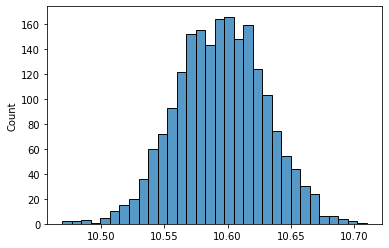

In [2]:
tam_am = 50
qtd_am = 2000

am = [rnd.sample(list(r),tam_am) for k in range(qtd_am)]

media_am = [np.mean(k) for k in am]

sns.histplot(data=media_am);

## Distribuição dos 5 percentis das Amostras

In [3]:
df = pd.DataFrame(am).T

prcts = [[df[j].quantile(0.20*k) for k in range(1,6)] for j in range(qtd_am)]

df2 = pd.DataFrame(prcts)

x5_m = len(df2[df2[4]<media])
medx3 = df2[2].mean()
    
print(f"Das {n} amostras {x5_m} tiveram x[5] menor que {media}, um percentual de {x5_m/n:.4%}")

print(f"Já x[3] teve valor médio de {medx3:.3f}")

Das 10000 amostras 0 tiveram x[5] menor que 9.781922378725783, um percentual de 0.0000%
Já x[3] teve valor médio de 10.680


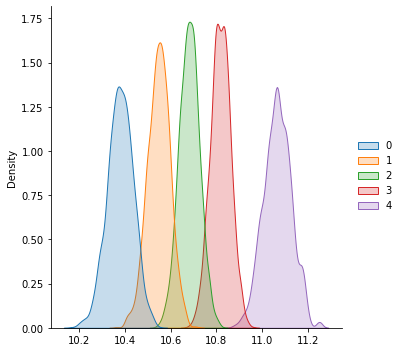

In [4]:
sns.displot(df2,kind="kde", fill=True);